In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from libs.losses import  l2
from libs.metric import SignalDice as sdsc

# Make Signals

In [2]:
def mse(a, b):
    return np.mean((a-b)**2)
    
    
def make_signals(sampling_rate, noise_level=0.3, shift=0.5, scale_factor=0.5):
    t = np.linspace(0,2*np.pi, sampling_rate) 
    gt = np.sin(t)#* 0.2
    signals = {
        "t" : t,
        "gt" : gt,
        "inverted": -gt,
        "scaled" :scale_factor * gt,
        "scaled2":scale_factor * gt*2,
        "scaled3":scale_factor * gt*4,
        "shift"  :np.sin(t)+shift,
        "shift2" :np.sin(t)-shift,
        "shift3" :np.sin(t)+shift+shift,
        "noisy":gt + noise_level * np.random.randn(sampling_rate),
        "hybrid": 0.8*np.sin(t+shift) #* 0.2
    }
    return signals


def make_peak_signals(sampling_rate, noise_level=0.3, shift=0.5, scale_factor=0.5):
    gt = np.ones(sampling_rate) 
    gt[int(sampling_rate//2)] = 10
    signals = {
        "gt" : gt,
        "line":np.ones(sampling_rate)*2,        
        "line2":np.ones(sampling_rate)/2,
    }
    return signals

In [3]:
sampling_rate = 1000
sdsc   = sdsc(eps=0)
signal = make_signals(sampling_rate)
peak_singal = make_peak_signals(sampling_rate)

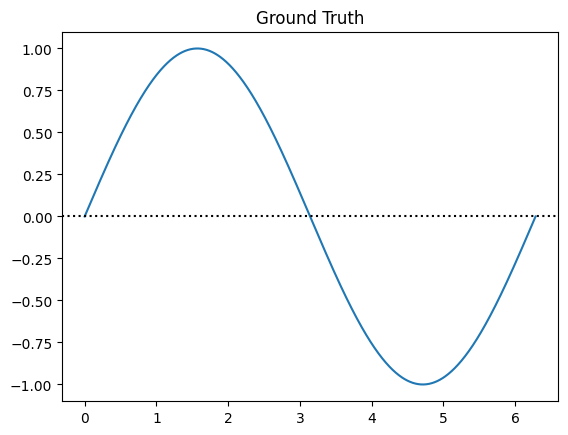

In [4]:
plt.figure()
plt.plot(signal['t'], signal['gt'])
plt.axhline(0, c="k", ls=":")
plt.title("Ground Truth")
plt.show()

# Low MSE SDSC zero

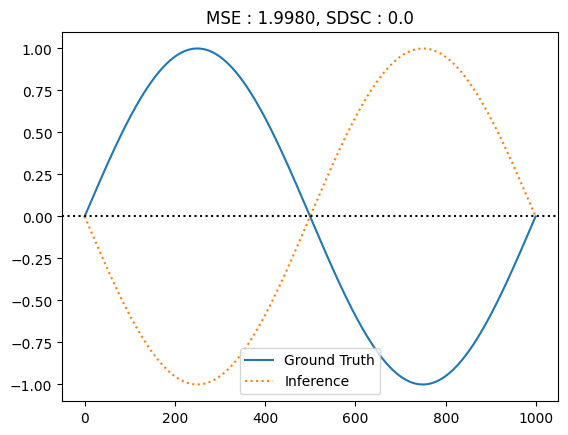

In [5]:
mse_result = mse(signal['gt'], signal['inverted'])
sdsc_result = sdsc(torch.tensor(signal['gt'], dtype=torch.float32), torch.tensor(signal['inverted'], dtype=torch.float32)).item()
plt.figure()
plt.plot(signal['gt'], label="Ground Truth")
plt.plot(signal['inverted'], ":", label="Inference")
plt.axhline(0, c="k", ls=":")
plt.legend()
plt.title(f"MSE : {mse_result:.4f}, SDSC : {sdsc_result}")
plt.show()

# Scaled Prediction

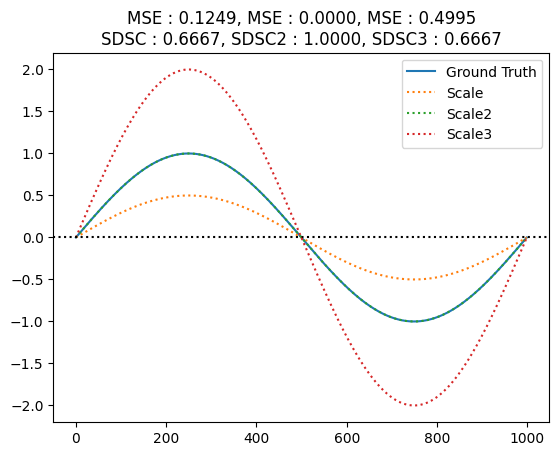

In [6]:
mse_result = mse(signal['gt'], signal['scaled'])
mse_result2 = mse(signal['gt'], signal['scaled2'])
mse_result3 = mse(signal['gt'], signal['scaled3'])
sdsc_result = sdsc(torch.tensor(signal['gt'], dtype=torch.float32), torch.tensor(signal['scaled'], dtype=torch.float32)).item()
sdsc_result2 = sdsc(torch.tensor(signal['gt'], dtype=torch.float32), torch.tensor(signal['scaled2'], dtype=torch.float32)).item()
sdsc_result3 = sdsc(torch.tensor(signal['gt'], dtype=torch.float32), torch.tensor(signal['scaled3'], dtype=torch.float32)).item()
plt.figure()
plt.plot(signal['gt'], label="Ground Truth")
plt.plot(signal['scaled'],":", label="Scale")
plt.plot(signal['scaled2'],":", label="Scale2")
plt.plot(signal['scaled3'],":", label="Scale3")
plt.axhline(0, c="k", ls=":")
plt.legend()
plt.title(f"MSE : {mse_result:.4f}, MSE : {mse_result2:.4f}, MSE : {mse_result3:.4f}\nSDSC : {sdsc_result:.4f}, SDSC2 : {sdsc_result2:.4f}, SDSC3 : {sdsc_result3:.4f}")
plt.show()

# Shift

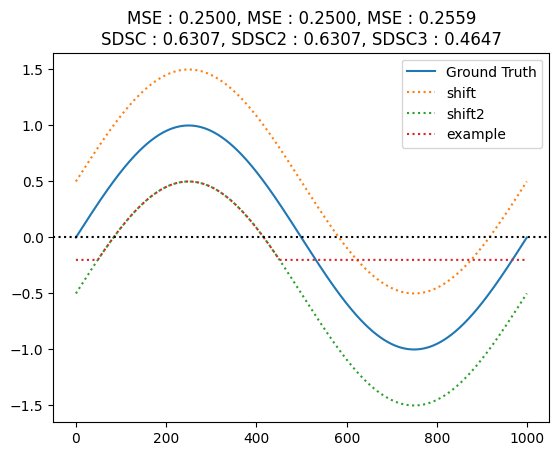

In [21]:
mse_result = mse(signal['gt'], signal['shift'])
mse_result2 = mse(signal['gt'], signal['shift2'])
mse_result3 = mse(signal['gt'], np.clip(signal['shift2'],a_min=-0.2, a_max=0.5))
sdsc_result = sdsc(torch.tensor(signal['gt'], dtype=torch.float32), torch.tensor(signal['shift'], dtype=torch.float32)).item()
sdsc_result2 = sdsc(torch.tensor(signal['gt'], dtype=torch.float32), torch.tensor(signal['shift2'], dtype=torch.float32)).item()
sdsc_result3 = sdsc(torch.tensor(signal['gt'], dtype=torch.float32), torch.tensor(np.clip(signal['shift2'],a_min=-0.2, a_max=0.5), dtype=torch.float32)).item()
plt.figure()
plt.plot(signal['gt'], label="Ground Truth")
plt.plot(signal['shift'],":", label="shift")
plt.plot(signal['shift2'],":", label="shift2")
plt.plot(np.clip(signal['shift2'],a_min=-0.2, a_max=0.5),":", label="example")
plt.axhline(0, c="k", ls=":")
plt.legend()
plt.title(f"MSE : {mse_result:.4f}, MSE : {mse_result2:.4f}, MSE : {mse_result3:.4f}\nSDSC : {sdsc_result:.4f}, SDSC2 : {sdsc_result2:.4f}, SDSC3 : {sdsc_result3:.4f}")
plt.show()

# Noisy prediction

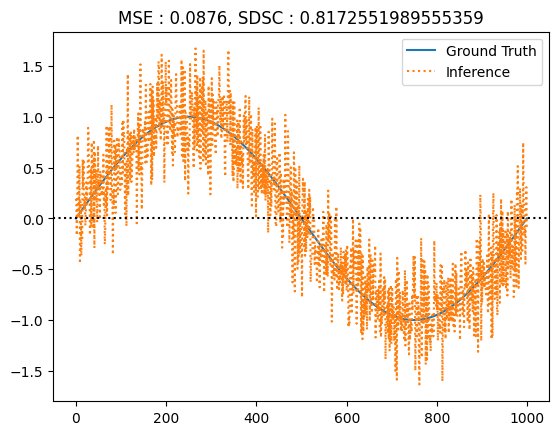

In [8]:
mse_result = mse(signal['gt'], signal['noisy'])
sdsc_result = sdsc(torch.tensor(signal['gt'], dtype=torch.float32), torch.tensor(signal['noisy'], dtype=torch.float32)).item()
plt.figure()
plt.plot(signal['gt'], label="Ground Truth")
plt.plot(signal['noisy'], ":",label="Inference")
plt.axhline(0, c="k", ls=":")
plt.legend()
plt.title(f"MSE : {mse_result:.4f}, SDSC : {sdsc_result}")
plt.show()

# Hybrid Reconstruction (MSE + SDSC)

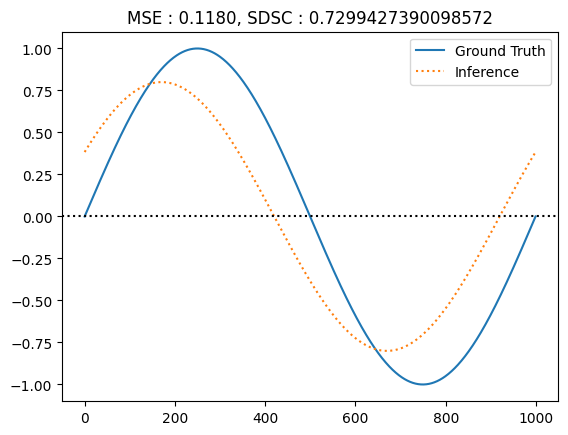

In [9]:
mse_result = mse(signal['gt'], signal['hybrid'])
sdsc_result = sdsc(torch.tensor(signal['gt'], dtype=torch.float32), torch.tensor(signal['hybrid'], dtype=torch.float32)).item()
plt.figure()
plt.plot(signal['gt'], label="Ground Truth")
plt.plot(signal['hybrid'],":", label="Inference")
plt.axhline(0, c="k", ls=":")
plt.legend()
plt.title(f"MSE : {mse_result:.4f}, SDSC : {sdsc_result}")
plt.show()

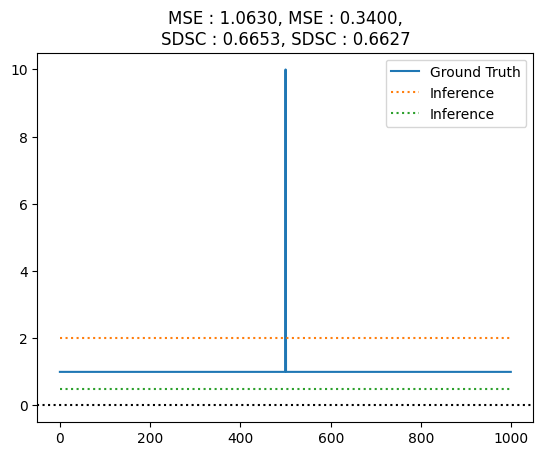

In [11]:
mse_result = mse(peak_singal['gt'], peak_singal['line'])
mse_result2 = mse(peak_singal['gt'], peak_singal['line2'])
sdsc_result = sdsc(torch.tensor(peak_singal['gt'], dtype=torch.float32), torch.tensor(peak_singal['line'], dtype=torch.float32)).item()
sdsc_result2 = sdsc(torch.tensor(peak_singal['gt'], dtype=torch.float32), torch.tensor(peak_singal['line2'], dtype=torch.float32)).item()
plt.figure()
plt.plot(peak_singal['gt'], label="Ground Truth")
plt.plot(peak_singal['line'],":", label="Inference")
plt.plot(peak_singal['line2'],":", label="Inference")
plt.axhline(0, c="k", ls=":")
plt.legend()
plt.title(f"MSE : {mse_result:.4f}, MSE : {mse_result2:.4f},\nSDSC : {sdsc_result:.4f}, SDSC : {sdsc_result2:.4f}")
plt.show()